In [2]:
options(repr.plot.width = 12, repr.plot.height = 6)

# EX 8.7 모의 실험 데이터

In [1]:
getwd()

[1] "/home/coco/Dropbox/Scribbling/posts"

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



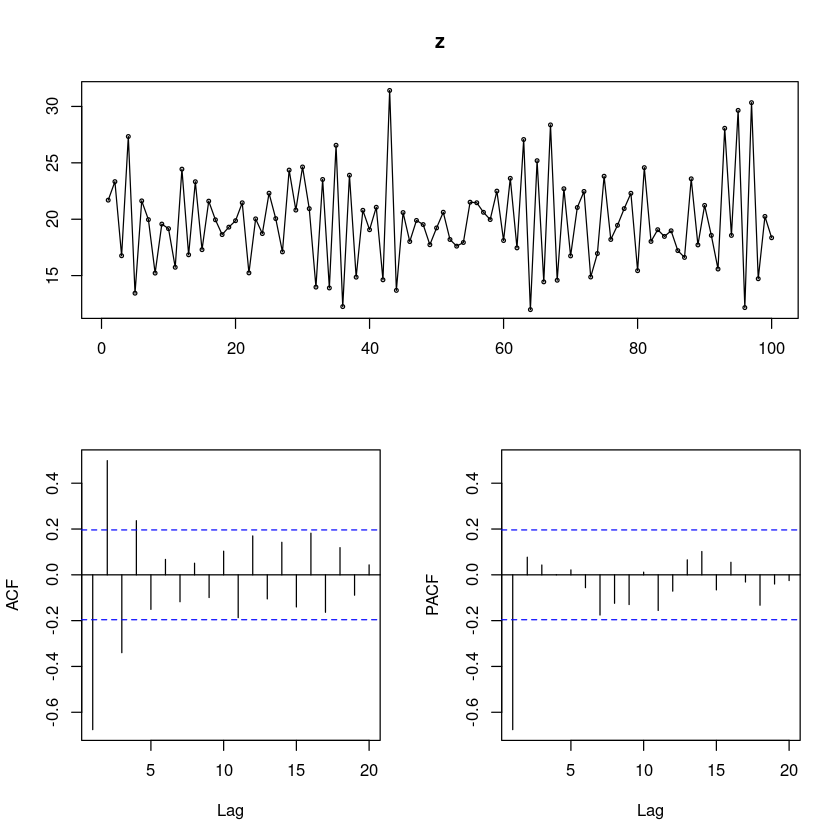

In [2]:
z <- scan("eg8_7.txt")
forecast::tsdisplay(z)

- 평균이 20정도로 움직이는 정상 시계열로 보인다. ---> AR(1)모형

`geom_smooth()` using formula = 'y ~ x'


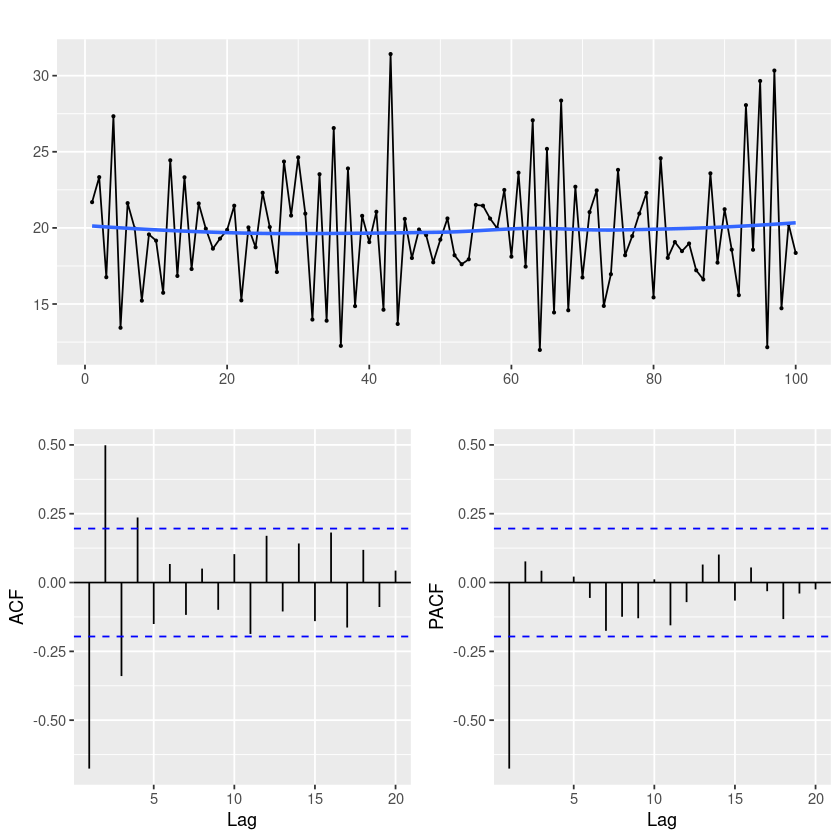

In [3]:
forecast::ggtsdisplay(z,
        smooth=T)

- `smooth=T`를 쓰면 추세가 있는지 확인하는 파란 선이 생긴다.

In [4]:
fit <- arima(z, order=c(1,0,0), method='ML')
fit


Call:
arima(x = z, order = c(1, 0, 0), method = "ML")

Coefficients:
          ar1  intercept
      -0.6715    19.8312
s.e.   0.0728     0.1776

sigma^2 estimated as 8.744:  log likelihood = -250.61,  aic = 507.22

In [5]:
mean(z)

[1] 19.83269

- `intercept`는 delta가 아니라 mu이다.

$\hat Z_n(l) = \hat μ + \hat ϕ^l(Z_n − \hat μ)$

In [6]:
length(z)

[1] 100

`-` 예측하는 함수

- 모형을 기준으로 25개를 예측할거야!

In [8]:
forecast_fit <- forecast::forecast(fit, 25) #MMSE : zn(l) = mu + phi^l*(zn-mu), l=1,...,25
forecast_fit

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
101       20.82225 17.03269 24.61181 15.02662 26.61788
102       19.16558 14.60082 23.73034 12.18439 26.14678
103       20.27811 15.40393 25.15229 12.82369 27.73253
104       19.53100 14.52353 24.53847 11.87273 27.18926
105       20.03272 14.96628 25.09915 12.28427 27.78116
106       19.69579 14.60299 24.78859 11.90702 27.48456
107       19.92205 14.81740 25.02670 12.11517 27.72893
108       19.77011 14.66013 24.88009 11.95507 27.58515
109       19.87214 14.75976 24.98453 12.05343 27.69086
110       19.80362 14.69015 24.91709 11.98325 27.62399
111       19.84964 14.73568 24.96359 12.02852 27.67076
112       19.81874 14.70456 24.93291 11.99728 27.64019
113       19.83949 14.72521 24.95376 12.01788 27.66110
114       19.82555 14.71123 24.93987 12.00387 27.64723
115       19.83491 14.72057 24.94925 12.01320 27.65662
116       19.82863 14.71428 24.94297 12.00690 27.65035
117       19.83285 14.71849 24.94720 12.01112 27.65457
118       

`-` 직접 계산

In [10]:
coef(fit)

ar1  intercept 
-0.6715441 19.8311503

In [11]:
hat_phi <- coef(fit)[1]
hat_mu <- coef(fit)[2]

In [12]:
hat_mu + hat_phi * (z[100] - hat_mu) # l= 1 z_100_(1)
hat_mu + hat_phi^2 * (z[100] - hat_mu) # l= 2 z_100_(2)

intercept 
 20.82225

intercept 
 19.16558

- 100번째를 기준으로 그 다음값을 구하고 싶어.

In [13]:
l <- 1:10
sapply(l, function(x) hat_mu + hat_phi^x * (z[100] - hat_mu))

intercept intercept intercept intercept intercept intercept intercept intercept 
 20.82225  19.16558  20.27811  19.53100  20.03272  19.69579  19.92205  19.77011 
intercept intercept 
 19.87214  19.80362

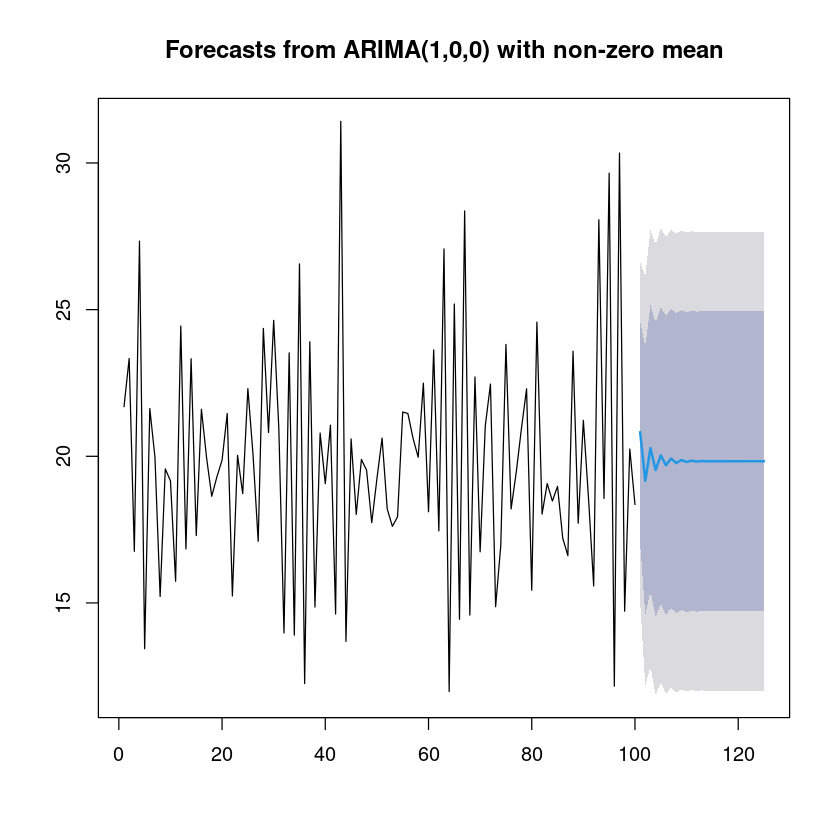

In [14]:
plot(forecast_fit)

- 점점 평균값으로 수렴한다. 

- AR process의 정보가 점점 사라지는 것..

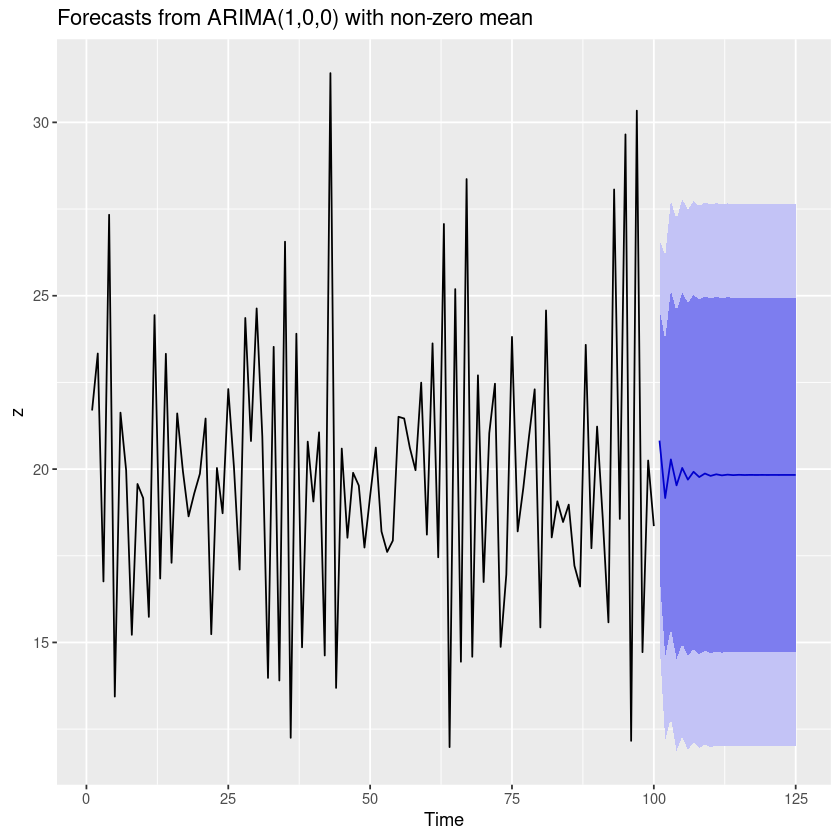

In [15]:
ggplot2::autoplot(forecast_fit)

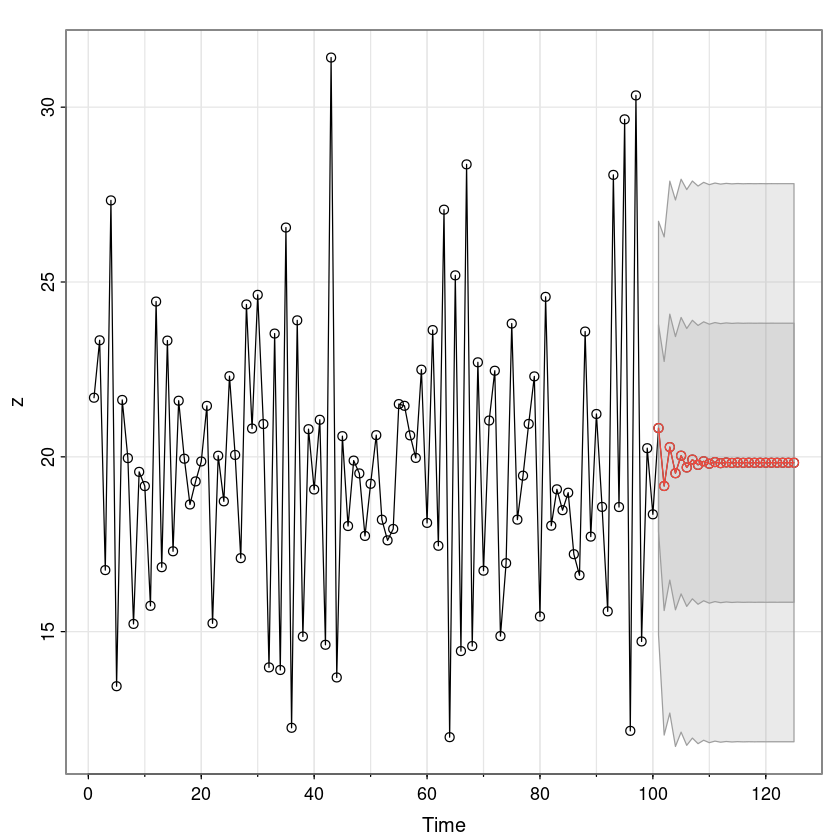

In [19]:
sarima_fit <- astsa::sarima.for(z,25,1,0,0)  # z함수, 25개 볼거야, p, d, q

In [17]:
sarima_fit$pred
sarima_fit$se

A Time Series:
 [1] 20.82225 19.16558 20.27811 19.53100 20.03271 19.69579 19.92205 19.77011
 [9] 19.87214 19.80362 19.84964 19.81874 19.83949 19.82555 19.83491 19.82863
[17] 19.83285 19.83001 19.83191 19.83064 19.83149 19.83092 19.83131 19.83105
[25] 19.83122

A Time Series:
 [1] 2.957007 3.561901 3.803344 3.907350 3.953359 3.973933 3.983176 3.987338
 [9] 3.989213 3.990059 3.990440 3.990612 3.990690 3.990724 3.990740 3.990747
[17] 3.990751 3.990752 3.990753 3.990753 3.990753 3.990753 3.990753 3.990753
[25] 3.990753

In [18]:
head(sarima_fit$pred + qnorm(0.975)*sarima_fit$se) ##95% 신뢰구간 상한
head(sarima_fit$pred - qnorm(0.975)*sarima_fit$se) ##95% 신뢰구간 하한

A Time Series:
[1] 26.61788 26.14678 27.73252 27.18926 27.78116 27.48456

A Time Series:
[1] 15.02662 12.18439 12.82369 11.87273 12.28427 11.90703

# EX 9.5 IMA(1,1) = ARIMA(0,1,1)

- 차분을 했더니 MA(1)모형

`geom_smooth()` using formula = 'y ~ x'


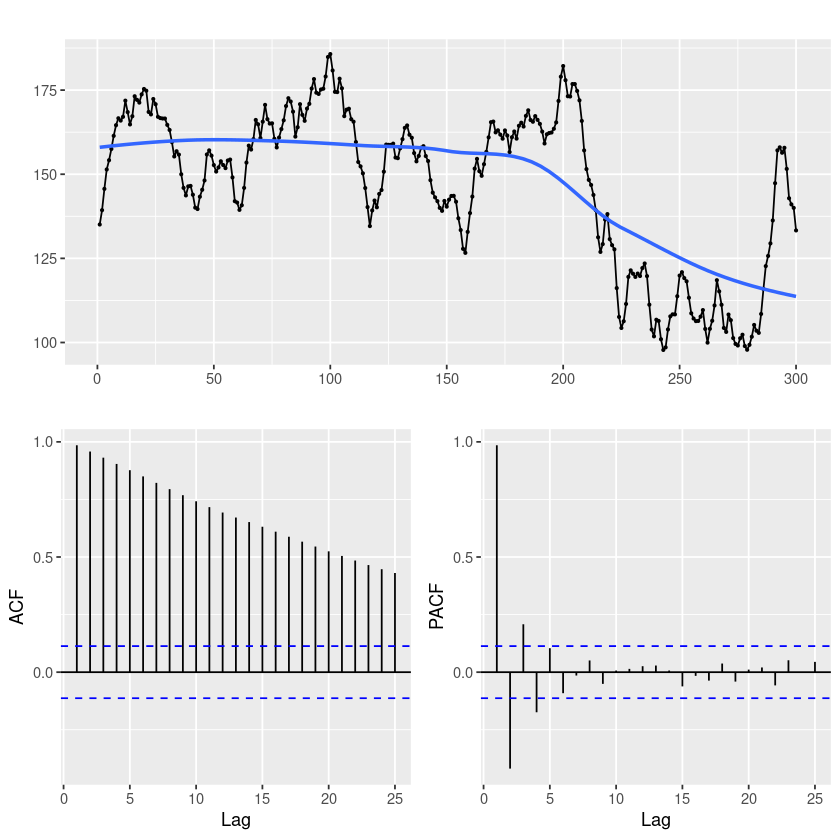

In [21]:
z <- scan("eg9_5.txt")
forecast::ggtsdisplay(z, smooth=T)

- ACF가 천천히 감소한다. (확률적 추세가 있어보임)

In [22]:
##단위근 검정 : H0 : 단위근이 있다.
fUnitRoots::adfTest(z, lags = 0, type = "c")
fUnitRoots::adfTest(z, lags = 1, type = "c")
fUnitRoots::adfTest(z, lags = 2, type = "c")


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -1.43
  P VALUE:
    0.5246 

Description:
 Tue Dec  5 20:19:59 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 1
  STATISTIC:
    Dickey-Fuller: -2.3543
  P VALUE:
    0.1803 

Description:
 Tue Dec  5 20:19:59 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 2
  STATISTIC:
    Dickey-Fuller: -1.7307
  P VALUE:
    0.4126 

Description:
 Tue Dec  5 20:19:59 2023 by user: 

- 평균이 있으니 'C' 옵션을 사용하자.

- 모든 차수에 대해서 p-value < 0.05이므로 차분이 필요하다.

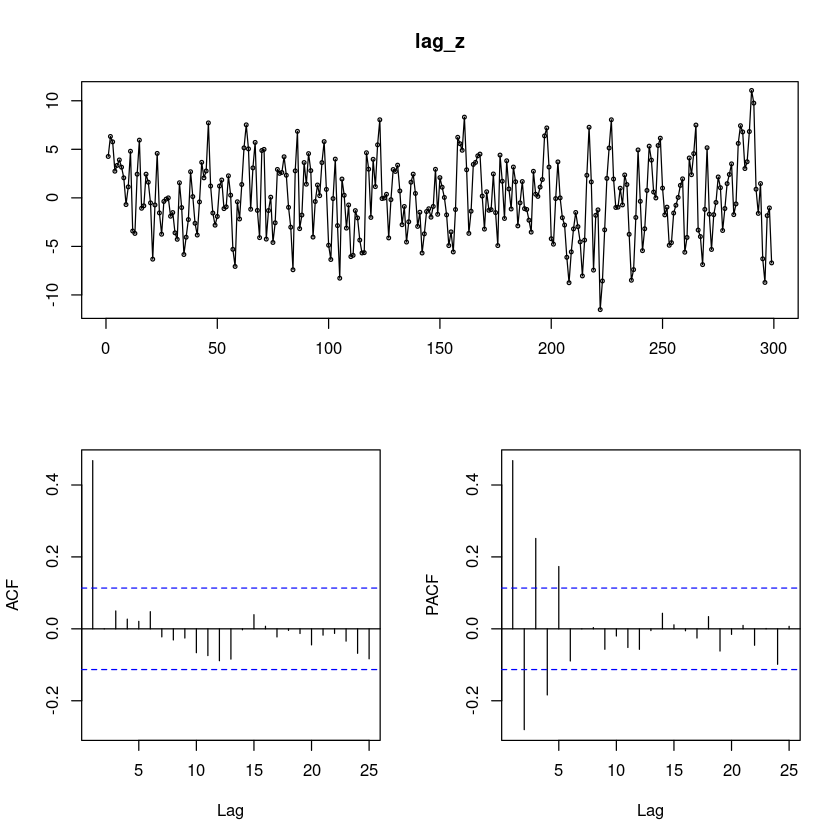

In [23]:
lag_z <- diff(z)
forecast::tsdisplay(lag_z)

- 0을 중심으로 움직인다.

- PACF가 SIN함수를 그리며 지수적으로 감소함

- ACF가 1차에만 유효하고 나머지는 유효하지 않음 -> MA(1)모형

In [24]:
## mean : H0 : mu = 0
t.test(lag_z)


	One Sample t-test

data:  lag_z
t = -0.02617, df = 298, p-value = 0.9791
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.4480209  0.4362617
sample estimates:
   mean of x 
-0.005879599 


- 유의확률이 크게 나와서 평균이 0이 맞아!

`-` 차분한 모형(평균 F)

In [25]:
fit1 <- arima(lag_z, order=c(0,0,1), include.mean = F)
fit1


Call:
arima(x = lag_z, order = c(0, 0, 1), include.mean = F)

Coefficients:
         ma1
      0.7605
s.e.  0.0342

sigma^2 estimated as 9.479:  log likelihood = -760.93,  aic = 1525.86

`-` 원래 모형(평균 있음)

In [26]:
fit <- arima(z, order=c(0,1,1))
fit


Call:
arima(x = z, order = c(0, 1, 1))

Coefficients:
         ma1
      0.7605
s.e.  0.0342

sigma^2 estimated as 9.479:  log likelihood = -760.93,  aic = 1525.86

- 두 가지 방법이 모두 동일하게 나온다.

$Z_t = ε_t + 0.7605ε_t, \hat θ = −0.7605$

- 부호가 반대!!!

- MA모형 평균이 없당

`-` 잔차분석


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 7.1117, df = 9, p-value = 0.6255

Model df: 1.   Total lags used: 10



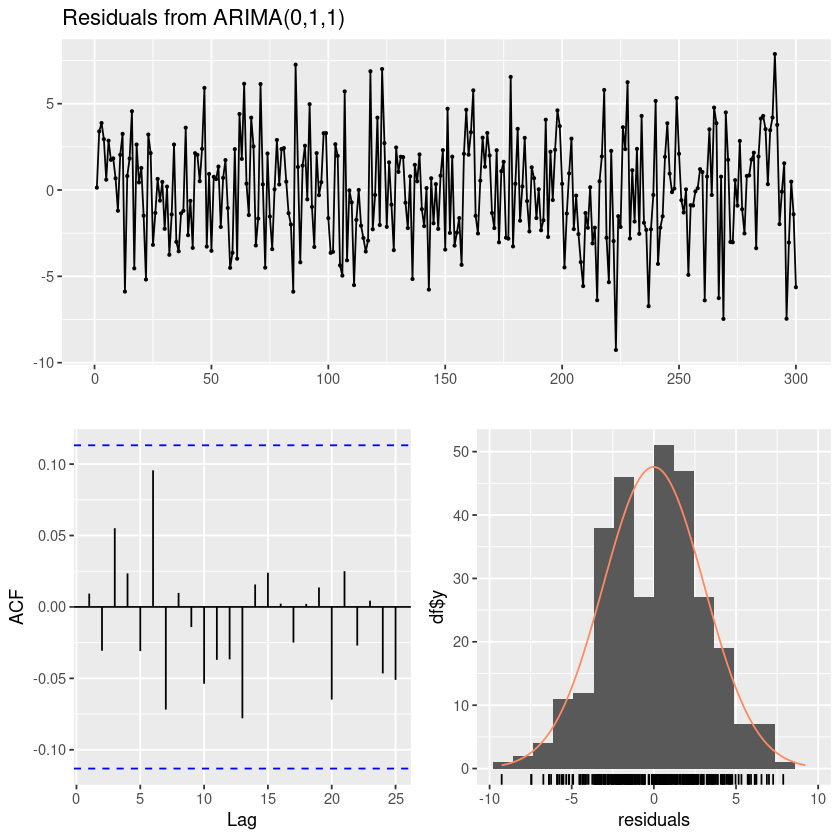

In [27]:
forecast::checkresiduals(fit)

- 정규분포

- 10개시차까지 모든 cov가 0

- WN이다

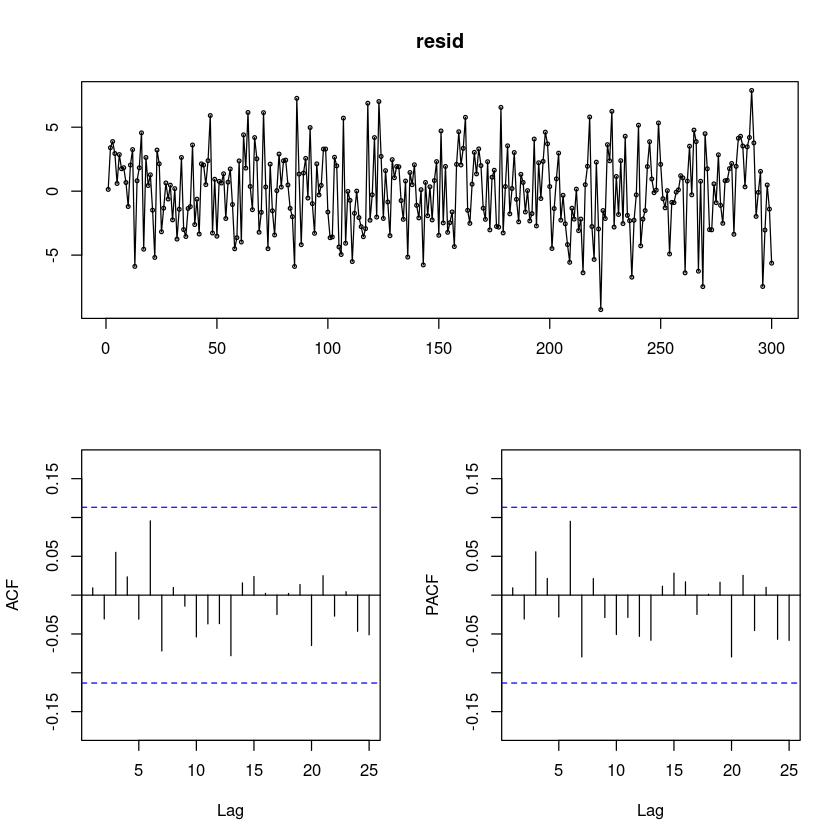

In [28]:
resid = resid(fit)
forecast::tsdisplay(resid)

In [41]:
# 잔차의 포트맨토 검정 ## H0 : rho1=...=rho_k=0
portes::LjungBox(fit, lags=c(6,12,18,24))

,lags,statistic,df,p-value
,6,4.520231,5,0.4771812
,12,7.964175,11,0.7165093
,18,10.346863,17,0.8884381
,24,12.926680,23,0.9535620


In [30]:
## 정규성검정
tseries::jarque.bera.test(resid) ##JB test H0: normal


	Jarque Bera Test

data:  resid
X-squared = 1.1606, df = 2, p-value = 0.5597


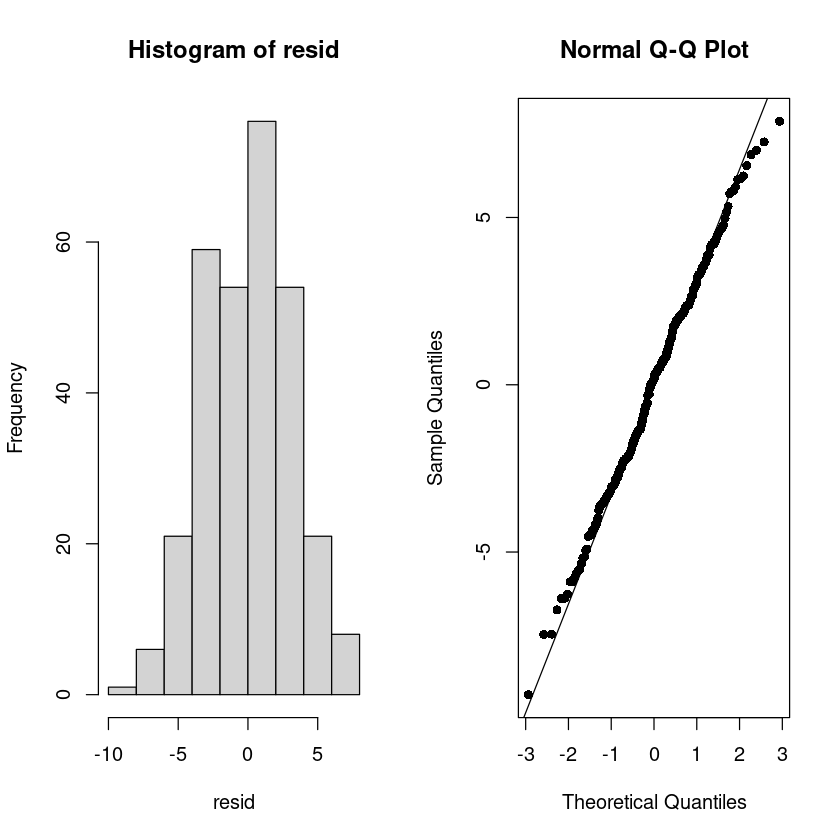

In [31]:
par(mfrow=c(1,2))
hist(resid)

qqnorm(resid, pch=16)
qqline(resid)

initial  value 1.355425 
iter   2 value 1.182804
iter   3 value 1.144176
iter   4 value 1.129179
iter   5 value 1.127095
iter   6 value 1.125914
iter   7 value 1.125753
iter   8 value 1.125727
iter   9 value 1.125726
iter  10 value 1.125726
iter  11 value 1.125726
iter  11 value 1.125726
final  value 1.125726 
converged
initial  value 1.125981 
iter   2 value 1.125979
iter   3 value 1.125977
iter   4 value 1.125975
iter   5 value 1.125974
iter   6 value 1.125974
iter   6 value 1.125974
final  value 1.125974 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = constant, transform.pars = trans, fixed = fixed, optim.control = list(trace = trc, 
        REPORT = 1, reltol = tol))

Coefficients:
         ma1  constant
      0.7605   -0.0146
s.e.  0.0342    0.3130

sigma^2 estimated as 9.479:  log likelihood = -760.93,  aic = 1527.86

$degrees_of_freedom
[1] 297

$ttable
         Estimate     SE t.value p.value
ma1        0.7605 0.0342 22.2124  0.0000
constant  -0.0146 0.3130 -0.0468  0.9627

$AIC
[1] 5.109891

$AICc
[1] 5.110027

$BIC
[1] 5.14702


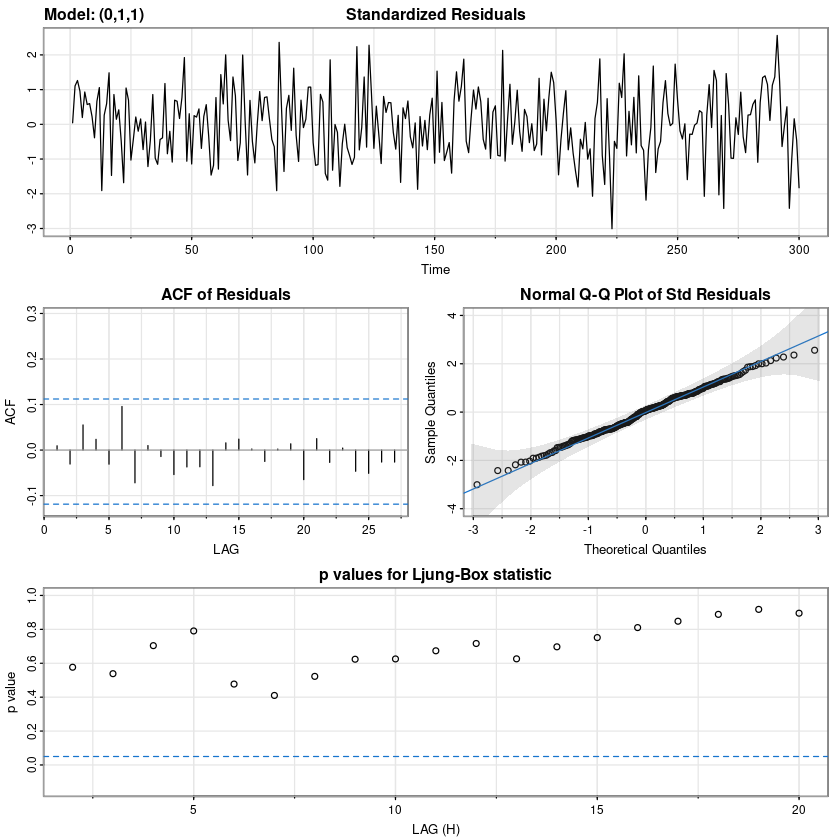

In [42]:
## 잔차 검정
astsa::sarima(z, p=0, d=1, q=1)

$(1-B)\hat Z_n (l) = \hat \mu - \hat \theta \hat \epsilon_n: l=1$

$\hat \mu: l \geq 2$

`-` 원데이터를예측하는 거니까 원데이터 넣어주기(차분데이터X)

In [43]:
fore_fit <- forecast::forecast(fit, 25)
fore_fit

    Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
301       129.0191 125.07348 132.9647 122.98480 135.0534
302       129.0191 121.03051 137.0077 116.80160 141.2366
303       129.0191 118.43291 139.6053 112.82893 145.2093
304       129.0191 116.35746 141.6807 109.65480 148.3834
305       129.0191 114.57726 143.4609 106.93221 151.1060
306       129.0191 112.99361 145.0446 104.51022 153.5280
307       129.0191 111.55296 146.4852 102.30694 155.7313
308       129.0191 110.22240 147.8158 100.27203 157.7662
309       129.0191 108.98000 149.0582  98.37194 159.6663
310       129.0191 107.81025 150.2279  96.58297 161.4552
311       129.0191 106.70173 151.3365  94.88763 163.1506
312       129.0191 105.64572 152.3925  93.27261 164.7656
313       129.0191 104.63541 153.4028  91.72746 166.3107
314       129.0191 103.66532 154.3729  90.24384 167.7944
315       129.0191 102.73101 155.3072  88.81493 169.2233
316       129.0191 101.82878 156.2094  87.43509 170.6031
317       129.0191 100.95554 15

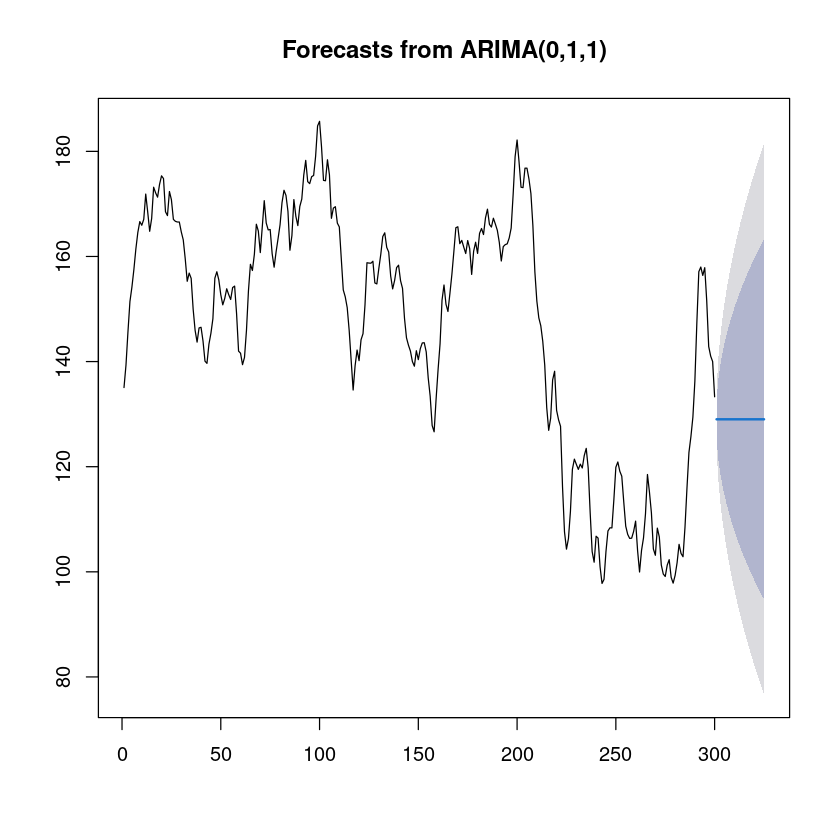

In [34]:
plot(fore_fit)

- 평균으로 거의 예측이 됨.

$pred
Time Series:
Start = 301 
End = 325 
Frequency = 1 
 [1] 129.0106 128.9960 128.9814 128.9667 128.9521 128.9374 128.9228 128.9082
 [9] 128.8935 128.8789 128.8643 128.8496 128.8350 128.8204 128.8057 128.7911
[17] 128.7764 128.7618 128.7472 128.7325 128.7179 128.7033 128.6886 128.6740
[25] 128.6593

$se
Time Series:
Start = 301 
End = 325 
Frequency = 1 
 [1]  3.078768  6.233577  8.260518  9.880021 11.269139 12.504886 13.629044
 [8] 14.667294 15.636757 16.549527 17.414520 18.238536 19.026898 19.783870
[15] 20.512928 21.216948 21.898346 22.559171 23.201183 23.825901 24.434652
[22] 25.028602 25.608779 26.176101 26.731384

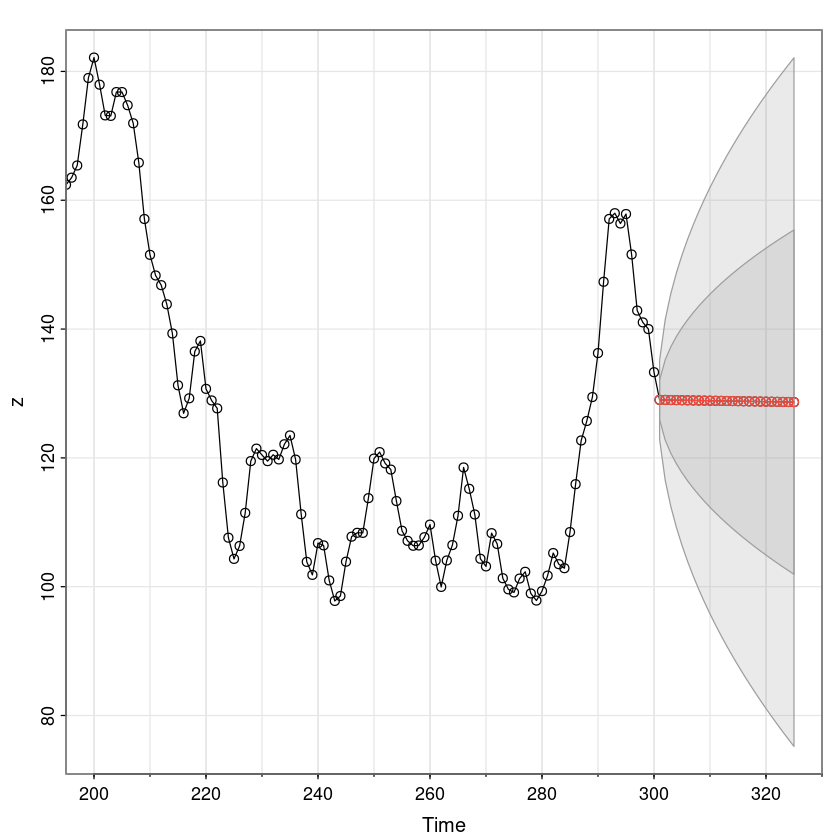

In [35]:
astsa::sarima.for(z, 25, 0,1,1)

$pred
Time Series:
Start = 300 
End = 324 
Frequency = 1 
 [1] -4.29136464 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
 [7] -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
[13] -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
[19] -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
[25] -0.01463663

$se
Time Series:
Start = 300 
End = 324 
Frequency = 1 
 [1] 3.078768 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966
 [9] 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966
[17] 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966 3.867966
[25] 3.867966

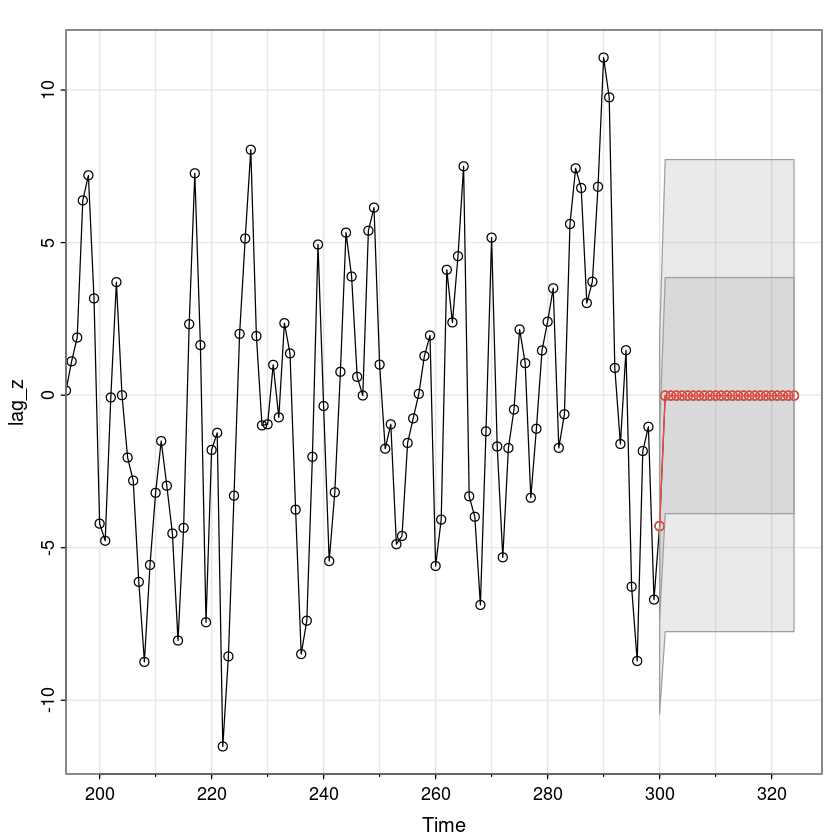

In [36]:
astsa::sarima.for(lag_z, 25, 0,0,1)

In [37]:
fore_diff_z <- astsa::sarima.for(lag_z, 25, 0,0,1, plot=F)$pred
fore_diff_z

A Time Series:
 [1] -4.29136464 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
 [7] -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
[13] -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
[19] -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663 -0.01463663
[25] -0.01463663

In [49]:
fore_diff_z_ <- forecast::forecast(fit1, 25)
fore_diff_z_$mean  # 차분한 값에 대한 예측

A Time Series:
 [1] -4.282901  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
 [8]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
[15]  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
[22]  0.000000  0.000000  0.000000  0.000000

In [38]:
fore_z <- astsa::sarima.for(z, 25, 0,1,1, plot=F)$pred
fore_z

A Time Series:
 [1] 129.0106 128.9960 128.9814 128.9667 128.9521 128.9374 128.9228 128.9082
 [9] 128.8935 128.8789 128.8643 128.8496 128.8350 128.8204 128.8057 128.7911
[17] 128.7764 128.7618 128.7472 128.7325 128.7179 128.7033 128.6886 128.6740
[25] 128.6593

In [48]:
fore_z_ <- forecast::forecast(fit,25)
fore_z_$mean

A Time Series:
 [1] 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191
 [9] 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191
[17] 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191 129.0191
[25] 129.0191

`-` 차분한 값에.. 원래데이터의 예측값을 알고 싶다면?

$\widehat{▽Z_t} = \hat Z_t − \hat Z_{t−1}$

$\hat Z_t = \widehat{▽Z_t} + \hat Z_{t−1}$

$\hat Z_{300}(1) = \widehat{▽Z_{300}(1)} + Z_{300}$

In [39]:
z_300_1 <- as.numeric(fore_diff_z[1]) + z[300]
z_300_1

[1] 129.0106

$\hat Z_{300}(2) = \widehat{▽Z_{300}(2)} + \hat Z_{300}(1)$

In [40]:
z_300_2 <- fore_diff_z[2] + z_300_1
z_300_2

[1] 128.996